In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
t = np.linspace(0,300,10000)

In [3]:
def rossler_system(t, xyz, a, b, c):
      """ Définition de Rossler system sous forme:
      x' = -y-z
      y' = x + a*y
      z' = b + z*(x - c) """

      x, y, z = xyz
      dxdt = -y - z
      dydt = x + a * y
      dzdt = b + z * (x - c)
      return [dxdt, dydt, dzdt]

In [4]:
alpha = 1
a = 0.2 + 0.09 * alpha
b = 0.2 - 0.06 * alpha
c = 5.7 - 1.18 * alpha

In [5]:
# Conditions initiales pour E1
e1 = [0, 1, 20]

# Conditions initiales pour E2
e2 = [1, 1, 20]

In [6]:
import time
t1=time.time()
# Solution de systéme pour l'attracteur E1
solution_e1 = solve_ivp(rossler_system, (0,300), e1, args=(a, b, c), t_eval=t)

# Solution de systéme pour l'attracteur E2
solution_e2 = solve_ivp(rossler_system, (0,300), e2, args=(a, b, c), t_eval=t)

t2=time.time()
print("temps pour solveur python",t2-t1)

temps pour solveur python 1.0128264427185059


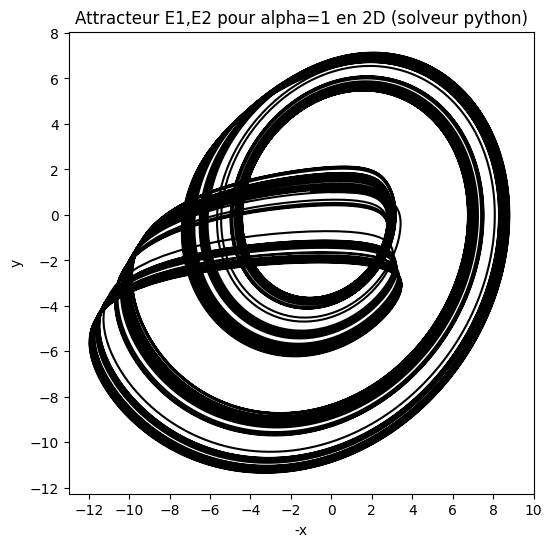

<Figure size 640x480 with 0 Axes>

In [7]:
#Representation de l'attracteur en 2d (-x,y)
plt.figure(figsize=(6, 6))
plt.plot(-solution_e1.y[0], solution_e1.y[1],color='black')
plt.plot(-solution_e2.y[0], solution_e2.y[1],color='black')
plt.title('Attracteur E1,E2 pour alpha=1 en 2D (solveur python)')
plt.xlabel('-x')
plt.ylabel('y')
xticks_positions = np.arange(-12, 12, 2)  # Graduations de 0 à 10 avec pas de 2
plt.xticks(xticks_positions)
yticks_positions = np.arange(-12, 10, 2)
plt.yticks(yticks_positions)
plt.show()
plt.savefig('2D.jpeg')

La representation graphique ci-dessus represente la solution des équations différentielles pour les conditions initiales ( pour E1 et E2).
Les points forment une structure complexe ce qui caractérise le comportement chaotique, On observe que les points de départ sont proches et commencent à s'éloligner rapidement et commencent à suivre des trajectoires différentes.

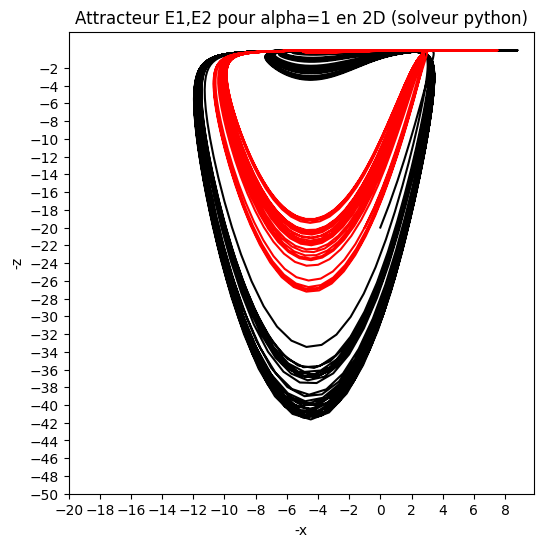

In [8]:
#Representation de l'attracteur en 2d (-x,-z)
plt.figure(figsize=(6, 6))
plt.plot(-solution_e1.y[0], -solution_e1.y[2],color='black')
plt.plot(-solution_e2.y[0], -solution_e2.y[2],color='red')
plt.title('Attracteur E1,E2 pour alpha=1 en 2D (solveur python)')
plt.xlabel('-x')
plt.ylabel('-z')
xticks_positions = np.arange(-20, 10, 2)  # Graduations de 0 à 10 avec pas de 2
plt.xticks(xticks_positions)
yticks_positions = np.arange(-50, 0, 2)
plt.yticks(yticks_positions)
plt.show()

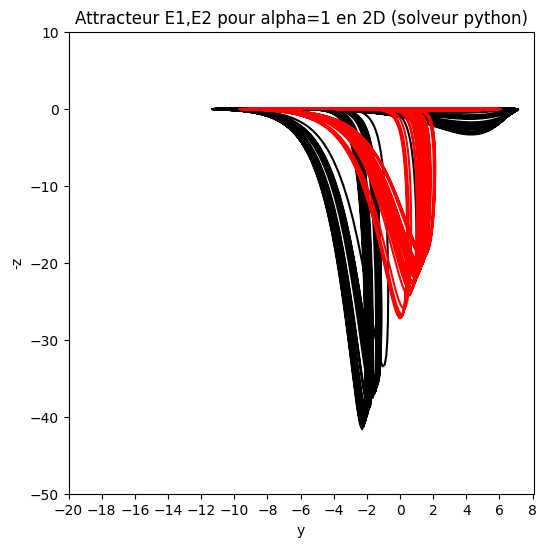

In [9]:
#Representation de l'attracteur en 2d (y,-z)
plt.figure(figsize=(6, 6))
plt.plot(solution_e1.y[1], -solution_e1.y[2],color='black')
plt.plot(solution_e2.y[1], -solution_e2.y[2],color='red')
plt.title('Attracteur E1,E2 pour alpha=1 en 2D (solveur python)')
plt.xlabel('y')
plt.ylabel('-z')
xticks_positions = np.arange(-20, 10, 2)  # Generating ticks from 0 to 10 with a step of 2
plt.xticks(xticks_positions)
yticks_positions = np.arange(-50, 20, 10)  # Generating ticks from 0 to 10 with a step of 2
plt.yticks(yticks_positions)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_10940\476693241.py:4: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  plt.plot(-solution_e1.y[0], solution_e1.y[1],-solution_e1.y[2],color='black')
C:\Users\hp\AppData\Local\Temp\ipykernel_10940\476693241.py:5: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  plt.plot(-solution_e2.y[0], solution_e2.y[1],-solution_e2.y[2],color='red')


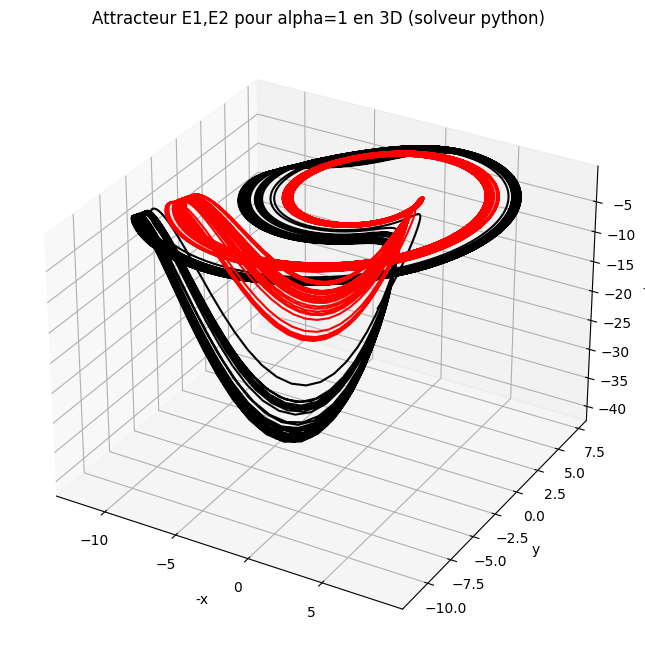

<Figure size 640x480 with 0 Axes>

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
#ax.plot(solution.y[0], solution.y[1], solution.y[2])
plt.plot(-solution_e1.y[0], solution_e1.y[1],-solution_e1.y[2],color='black')
plt.plot(-solution_e2.y[0], solution_e2.y[1],-solution_e2.y[2],color='red')
ax.set_title('Attracteur E1,E2 pour alpha=1 en 3D (solveur python)')
ax.set_xlabel('-x')
ax.set_ylabel('y')
ax.set_zlabel('-z')
plt.show()
plt.savefig('3D.jpeg')

la representation graphique 3d montre le comportement chaotique du systéme similaire à ce qu'on a observé dans la représentation 2D , en plus on voit que les conditions initiales jouent un rôle trés important (qu'on on change les conditions initiales le comportement change) On peut dire que le systéme est sensible et dependant aux conditions initiales

In [11]:
#Redéfinition de Rosller system en ajoutant u0 (vecteur des conditions initiales)  pour implémenter Runge-Kutta4
u0 = [1.0, 0.0, 0.0]
def rossler_system(t, u0, alpha):
    a = 0.2 + 0.09 * alpha
    b = 0.2 - 0.06 * alpha
    c = 5.7 - 1.18 * alpha
    x = u0[0]
    y = u0[1]
    z = u0[2]
    dxdt = -y - z
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return [dxdt, dydt, dzdt]

def runge_kutta4(f, u0, t, alpha):
    n = len(t)
    h = t[1] - t[0] #pas
    print(h)
    u = np.zeros((n, len(u0)))
    #print(u)
    u[0] = u0
    for i in range(1, n):
        #h = t[i+1] - t[i]
        k1 = h * np.array(f(t[i-1], u[i-1], alpha))
        k2 = h * np.array(f(t[i-1] + h/2, u[i-1] + k1/2, alpha))
        k3 = h * np.array(f(t[i-1] +  h/2, u[i - 1] + k2/2, alpha))
        k4 = h * np.array(f(t[i-1] + h, u[i - 1] + k3, alpha))

        u[i] = u[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return u

In [12]:
# sol = runge_kutta4(rossler_system, u0, t, alpha)

0.030003000300030003
E1 [[ 1.          1.         20.        ]
 [ 0.40168457  1.02971029 17.83579823]
 [-0.13155404  1.04262589 15.63846246]
 ...
 [-2.8722797  -0.69709191  0.02473704]
 [-2.8507045  -0.78941913  0.02359072]
 [-2.82632666 -0.88186085  0.02268645]]
0.030003000300030003
E2 [[ 0.          1.         20.        ]
 [-0.58960493  0.99966549 17.3102187 ]
 [-1.09972749  0.98276424 14.7377096 ]
 ...
 [ 5.7824012   2.23847144  0.94902927]
 [ 5.68328243  2.43080561  0.9884933 ]
 [ 5.57725378  2.62172953  1.02626356]]
temps pour RK4 1.683535099029541


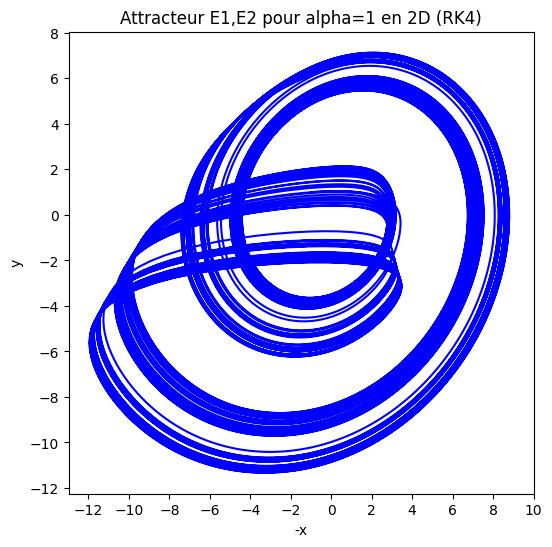

In [13]:
import time
t1=time.time()
cond_E1 = [1.0,1.0,20.0]
cond_E2 = [0.0,1.0,20.0]
solution_e1 = runge_kutta4(rossler_system,cond_E1, t, alpha)
print("E1",solution_e1)

solution_e2 = runge_kutta4(rossler_system, cond_E2, t, alpha)
print("E2",solution_e2)
t2=time.time()
print("temps pour RK4",t2-t1)
plt.figure(figsize=(6, 6))
plt.plot(-solution_e1[:,0], solution_e1[:,1],color='b')
plt.plot(-solution_e2[:,0], solution_e2[:,1],color='b')
plt.title('Attracteur E1,E2 pour alpha=1 en 2D (RK4)')
plt.xlabel('-x')
plt.ylabel('y')
xticks_positions = np.arange(-12, 12, 2)
plt.xticks(xticks_positions)
yticks_positions = np.arange(-12, 10, 2)
plt.yticks(yticks_positions)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_10940\1675543589.py:5: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  plt.plot(-solution_e1[:,0], solution_e1[:,1],-solution_e1[:,2],color='b')
C:\Users\hp\AppData\Local\Temp\ipykernel_10940\1675543589.py:6: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  plt.plot(-solution_e2[:,0], solution_e2[:,1],-solution_e2[:,2],color='b')


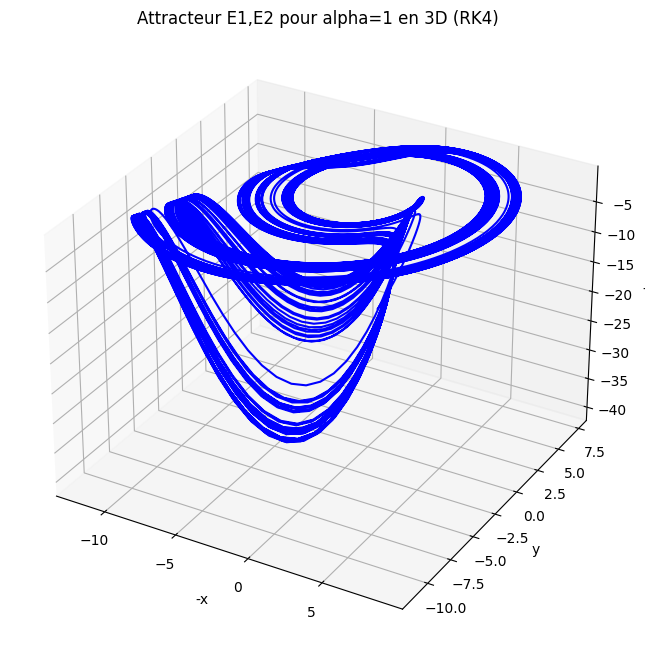

In [14]:
#La même que la premiére presentation
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

plt.plot(-solution_e1[:,0], solution_e1[:,1],-solution_e1[:,2],color='b')
plt.plot(-solution_e2[:,0], solution_e2[:,1],-solution_e2[:,2],color='b')

ax.set_title('Attracteur E1,E2 pour alpha=1 en 3D (RK4)')
ax.set_xlabel('-x')
ax.set_ylabel('y')
ax.set_zlabel('-z')
plt.show()


In [15]:
# #Definition des points fixes
# import math
# def points_fixes(a, b, c):
#   x_moins = (c - math.sqrt(c**2 - 4*a*b))/2
#   x_plus  = (c + math.sqrt(c**2 - 4*a*b))/2

#   y_moins = (-c - math.sqrt(c**2 - 4*a*b))/(2 * a)
#   y_plus  = (-c + math.sqrt(c**2 - 4*a*b))/(2 * a)

#   z_moins = (c - math.sqrt(c**2 - 4*a*b))/(2 * a)
#   z_plus  = (c + math.sqrt(c**2 - 4*a*b))/(2 * a)

#   return np.array([[x_moins,x_plus],[y_moins,y_plus],[z_moins,z_plus]])

# S=points_fixes(a,b,c)

In [16]:
# points_fixes(a,b,c)

In [17]:
#Section de Poincarré:
import math
def poincarre(x,alpha) :
    a = 0.2 + 0.09*alpha
    b = 0.2 - 0.06*alpha
    c = 5.7 - 1.18*alpha

    x_moins = (c-math.sqrt(c**2-4*a*b))/2
    ha = []
    for i in range(1, len(x)):
        if x[i,0] < x_moins and x[i-1,0] >= x_moins:
            ha.append([x[i,0], x[i,1], x[i,2]])

    return ha

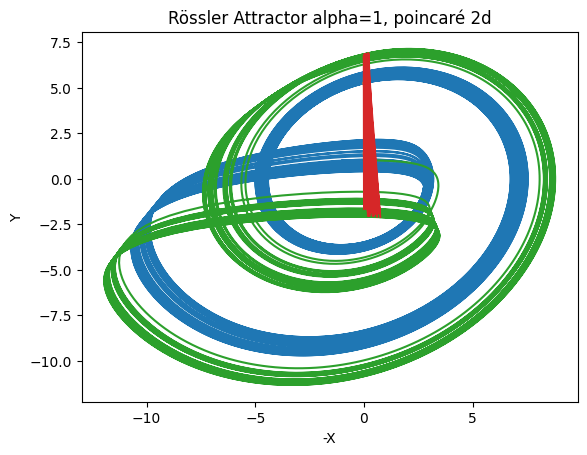

<Figure size 640x480 with 0 Axes>

In [18]:
s = np.array(poincarre(solution_e1,alpha))
s1 = np.array(poincarre(solution_e2,alpha))


################################################## 2d plot

plt.figure()
plt.plot(-solution_e1[:,0], solution_e1[:,1])
plt.plot(-s[:,0], s[:,1])
plt.plot(-solution_e2[:,0], solution_e2[:,1])
plt.plot(-s1[:,0], s1[:,1])
plt.xlabel('-X')
plt.ylabel('Y')
plt.title("Rössler Attractor alpha=1, poincaré 2d")

plt.show()
plt.savefig('2Dplot.png', bbox_inches='tight')

C:\Users\hp\AppData\Local\Temp\ipykernel_10940\3875336645.py:3: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.plot(-solution_e1[:,0], solution_e1[:,1], -solution_e1[:,2], label='Courbe', c='blue')
C:\Users\hp\AppData\Local\Temp\ipykernel_10940\3875336645.py:4: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.plot(-solution_e2[:,0], solution_e2[:,1], -solution_e2[:,2], label='Courbe', c='blue')
C:\Users\hp\AppData\Local\Temp\ipykernel_10940\3875336645.py:5: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.scatter3D(-s[:,0],s[:,1],-s[:,2], c="r")
C:\Users\hp\AppData\Loc

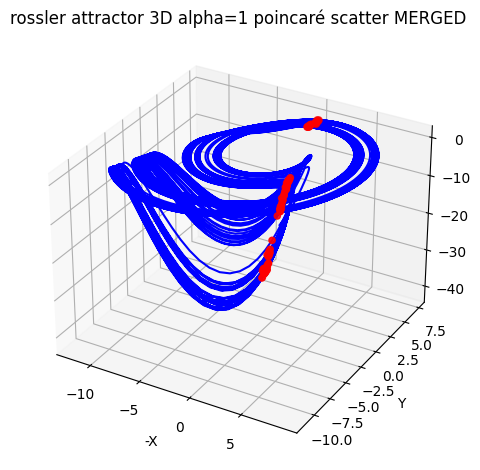

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(-solution_e1[:,0], solution_e1[:,1], -solution_e1[:,2], label='Courbe', c='blue')
ax.plot(-solution_e2[:,0], solution_e2[:,1], -solution_e2[:,2], label='Courbe', c='blue')
ax.scatter3D(-s[:,0],s[:,1],-s[:,2], c="r")
ax.scatter3D(-s1[:,0],s1[:,1],-s1[:,2], c="r")
plt.title("rossler attractor 3D alpha=1 poincaré scatter MERGED")
ax.set_xlabel('-X')
ax.set_ylabel('Y')
plt.tight_layout()
plt.show()

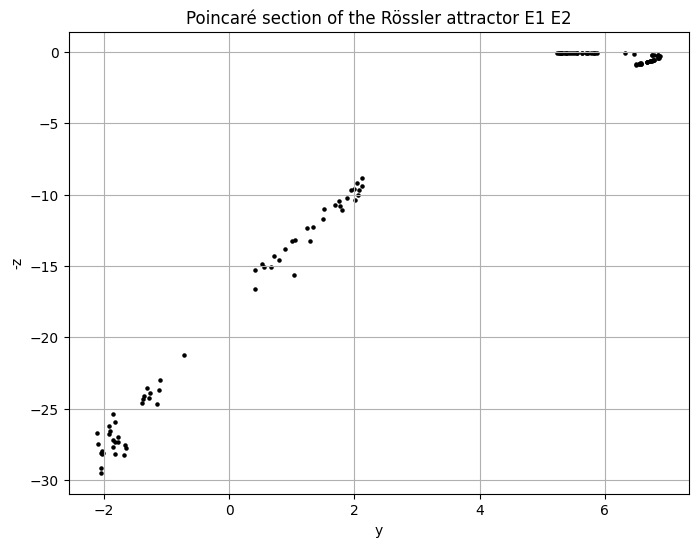

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(s[:,1], -s[:,2], s=5, c='black')
plt.scatter(s1[:,1], -s1[:,2], s=5, c='black')
plt.title('Poincaré section of the Rössler attractor E1 E2')
plt.xlabel('y')
plt.ylabel('-z')
plt.grid(True)
plt.show()

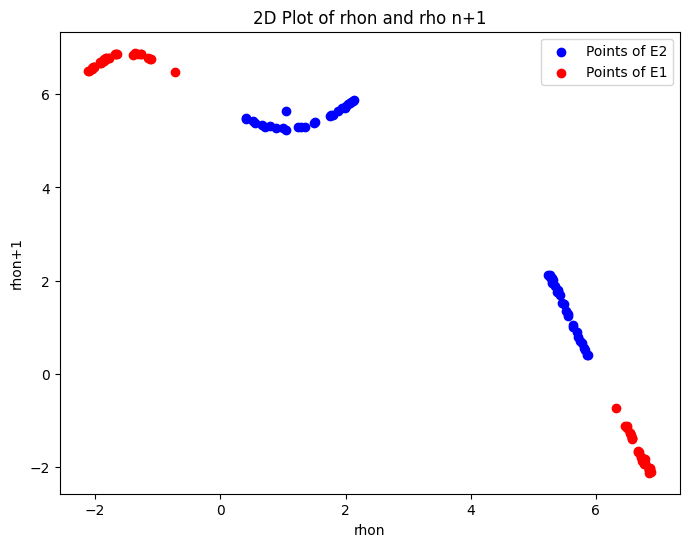

In [21]:
# construction of the return map

points = poincarre(solution_e1,alpha)
points1 = poincarre(solution_e2,alpha)

points_rhon = []
points_rhone1 = []
for i in range(len(points)) :
    points_rhon.append(points[i][1])

for i in range(len(points1)) :
    points_rhone1.append(points1[i][1])

points_rhon1 = np.array(points_rhon[:-1])
points_rhon2 = np.array(points_rhon[1:])
points_rhone11 = np.array(points_rhone1[:-1])
points_rhone12 = np.array(points_rhone1[1:])


# plot of the return map

plt.figure(figsize=(8, 6))
plt.scatter(points_rhon1, points_rhon2, c='blue', label='Points of E2')
plt.scatter(points_rhone11, points_rhone12, c='red', label='Points of E1')
plt.xlabel('rhon')
plt.ylabel('rhon+1')
plt.title('2D Plot of rhon and rho n+1')
# plt.plot(points_rhon1, points_rhon2, color='red', linestyle='-', linewidth=1, label='Connection')
plt.legend()
plt.show()
